## **DATA COLLECTION**

**Loading Data**

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv('/content/Unemployment in India.csv')

In [ ]:
data.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [ ]:
data['Date'] = pd.to_datetime(data[' Date'])

data['Month'] = data['Date'].dt.month
data['Year'] = data['Date'].dt.year
data['Day'] = data['Date'].dt.day

<ipython-input-81-c6161f8f04c7>:1: UserWarning: Parsing dates in  %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['Date'] = pd.to_datetime(data[' Date'])


In [ ]:
data.drop([' Date'],axis=1,inplace=True)

In [ ]:
data.head()

,Region,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area,Date,Month,Year,Day
0,Andhra Pradesh,Monthly,3.65,11999139.0,43.24,Rural,2019-05-31,5.0,2019.0,31.0
1,Andhra Pradesh,Monthly,3.05,11755881.0,42.05,Rural,2019-06-30,6.0,2019.0,30.0
2,Andhra Pradesh,Monthly,3.75,12086707.0,43.50,Rural,2019-07-31,7.0,2019.0,31.0
3,Andhra Pradesh,Monthly,3.32,12285693.0,43.97,Rural,2019-08-31,8.0,2019.0,31.0
4,Andhra Pradesh,Monthly,5.17,12256762.0,44.68,Rural,2019-09-30,9.0,2019.0,30.0


## **DATA PREPROCESSING**

**Data Cleaning**

In [ ]:
data.isnull()

,Region,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area,Date,Month,Year,Day
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
763,True,True,True,True,True,True,True,True,True,True
764,True,True,True,True,True,True,True,True,True,True
765,True,True,True,True,True,True,True,True,True,True
766,True,True,True,True,True,True,True,True,True,True


In [ ]:
data.isnull().sum()

Region                                      28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
Date                                        28
Month                                       28
Year                                        28
Day                                         28
dtype: int64

In [ ]:
data.fillna(0,inplace=True)

In [ ]:
data.isnull().sum()

Region                                      0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Area                                        0
Date                                        0
Month                                       0
Year                                        0
Day                                         0
dtype: int64

In [ ]:
data['Month'] = data['Month'].astype(int)
data['Year'] = data['Year'].astype(int)
data['Day'] = data['Day'].astype(int)

**Classified into Categorical and Numerical Columns**

In [ ]:
numerical_columns=[]
categorical_columns=[]
for column in data.columns:
  if data[column].dtype == 'object':
    categorical_columns.append(column)
  else:
    numerical_columns.append(column)

print("Numerical Columns:",numerical_columns)
print("categorical Columns :",categorical_columns)

Numerical Columns: [' Estimated Unemployment Rate (%)', ' Estimated Employed', ' Estimated Labour Participation Rate (%)', 'Month', 'Year', 'Day']
categorical Columns : ['Region', ' Frequency', 'Area', 'Date']


**Outlier Detection And Removal**

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
def boxplot(column):
    plt.figure(figsize=(8, 6))
    sns.boxplot(y=data[column])
    plt.title(f'Box Plot of {column}')
    plt.show()

Before Outlier Removing:   Estimated Unemployment Rate (%)


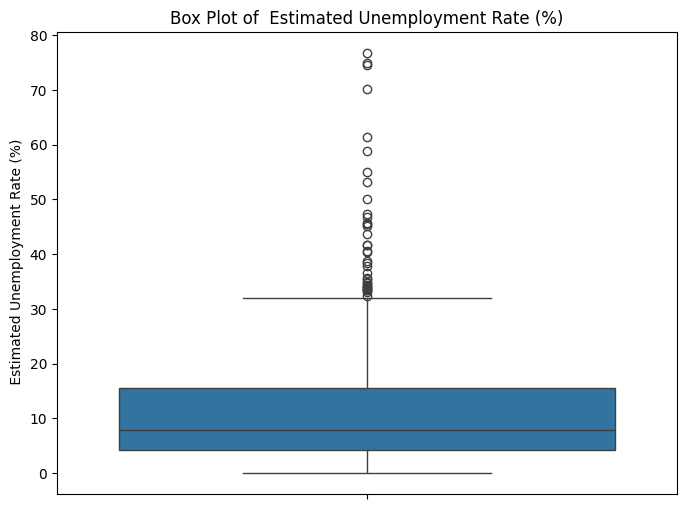

After Outlier Removing:   Estimated Unemployment Rate (%)


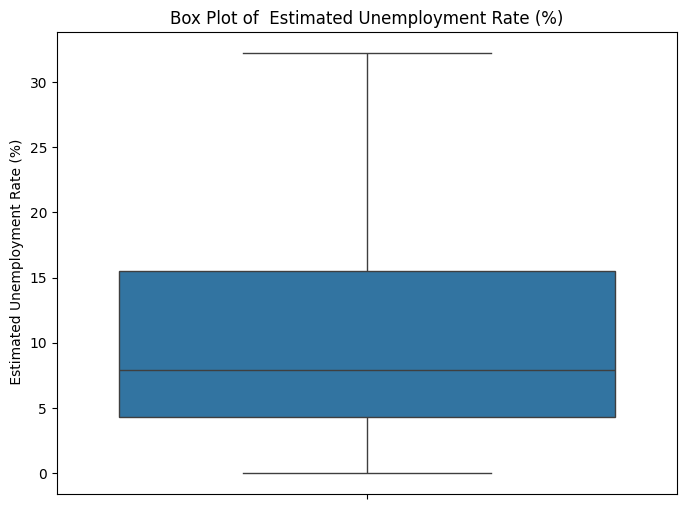

Before Outlier Removing:   Estimated Employed


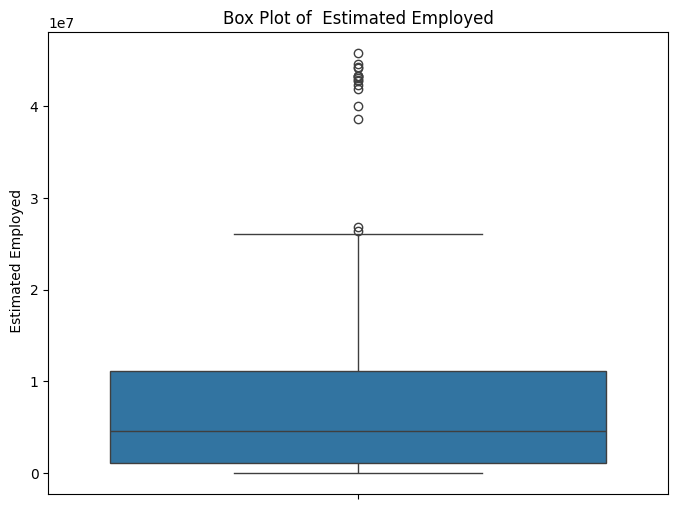

After Outlier Removing:   Estimated Employed


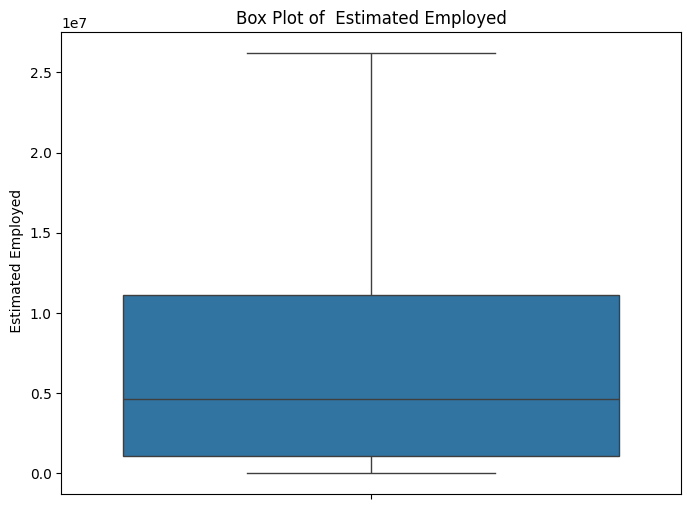

Before Outlier Removing:   Estimated Labour Participation Rate (%)


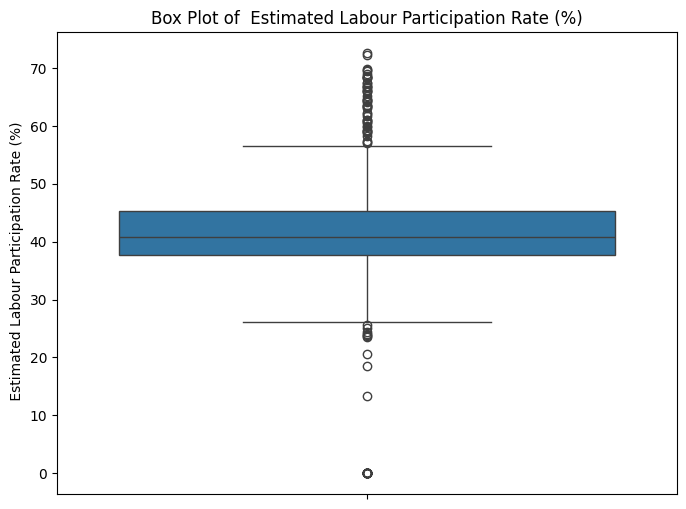

After Outlier Removing:   Estimated Labour Participation Rate (%)


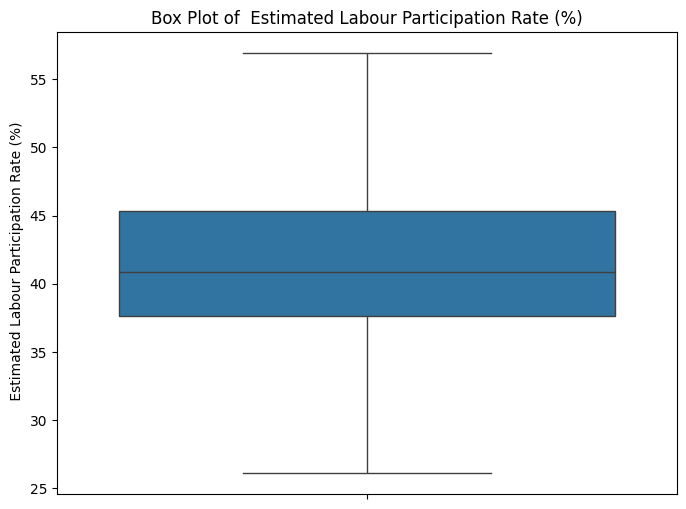

Before Outlier Removing:  Month


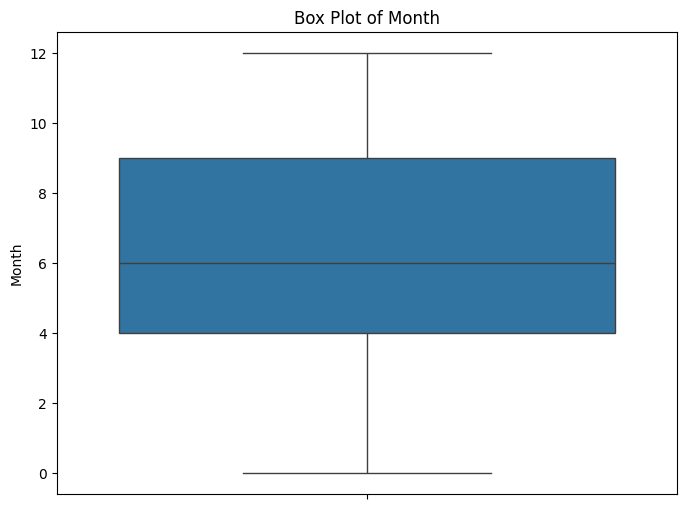

After Outlier Removing:  Month


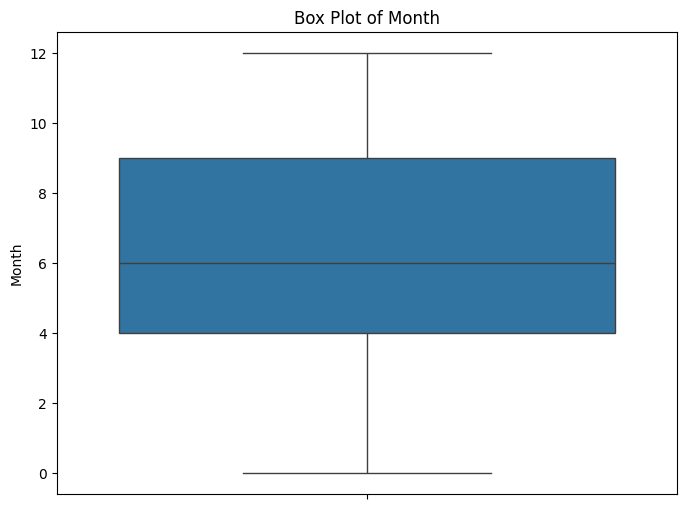

Before Outlier Removing:  Year


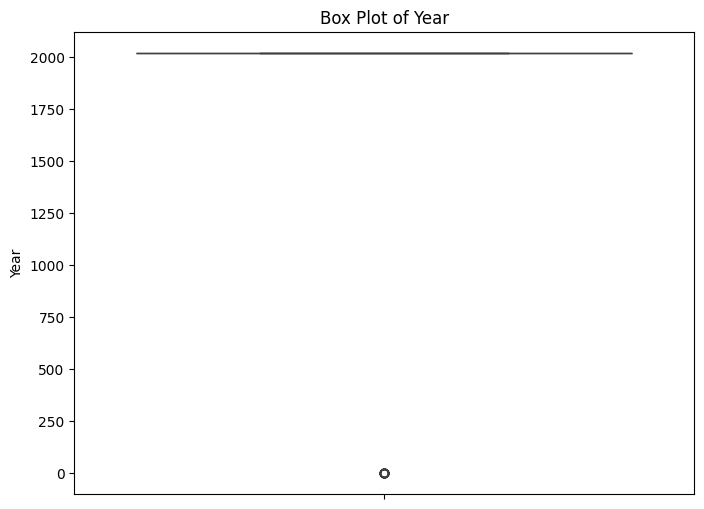

After Outlier Removing:  Year


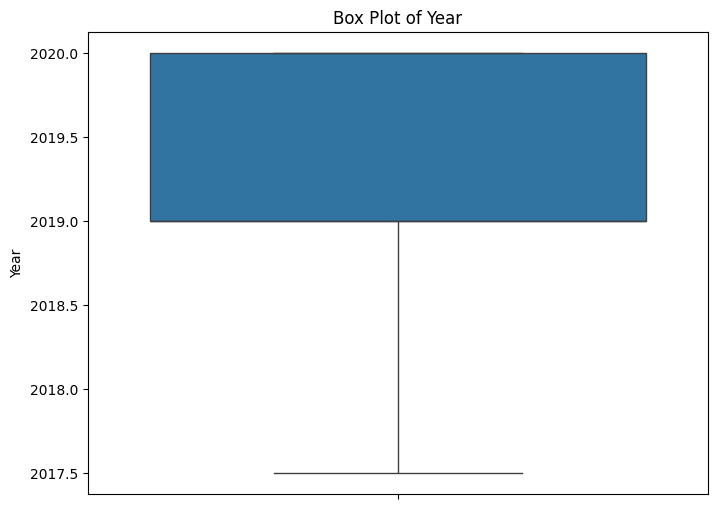

Before Outlier Removing:  Day


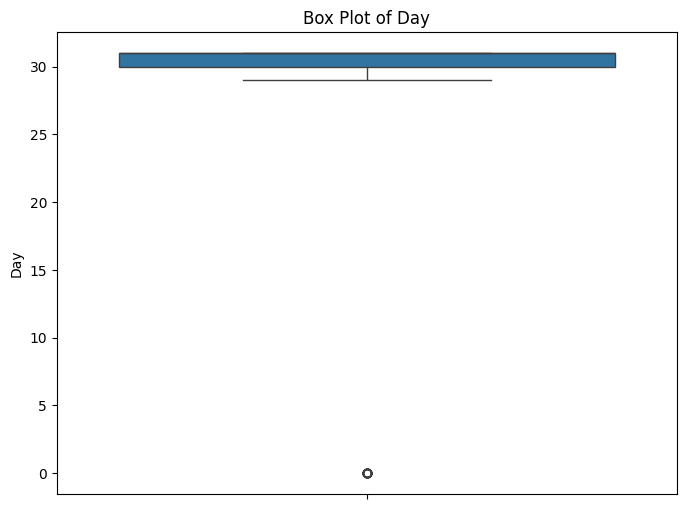

After Outlier Removing:  Day


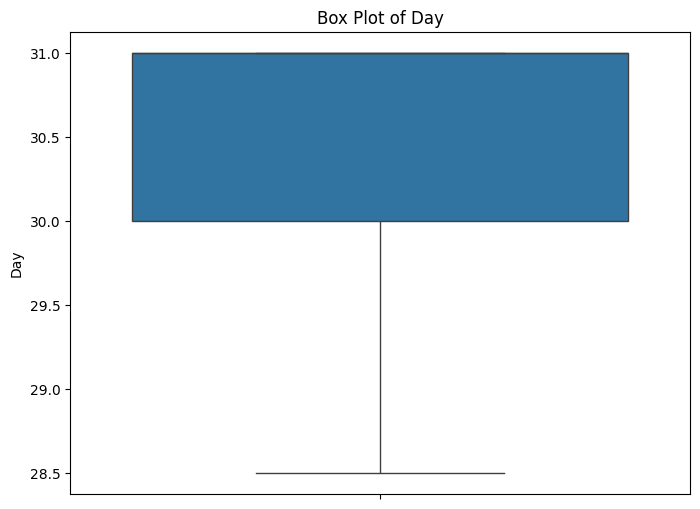

In [ ]:
#outlier is removed using iqr method
for column in numerical_columns:

    print("Before Outlier Removing: ",column)

    boxplot(column)

    print("After Outlier Removing: ",column)

    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1

    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    data.loc[(data[column] < lower_bound),column] = lower_bound
    data.loc[(data[column] > upper_bound),column] = upper_bound

    boxplot(column)



## **DATA VISUALIZATION**

In [ ]:
# Summary statistics
data.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Month,Year,Day
count,768.000000,7.680000e+02,768.000000,768.000000,768.000000,768.000000
mean,10.774486,6.636920e+06,41.599826,6.157552,2019.348958,30.429688
std,8.714194,6.919141e+06,7.217441,3.394131,0.603639,0.721438
min,0.000000,0.000000e+00,26.106250,0.000000,2017.500000,28.500000
25%,4.305000,1.057188e+06,37.660000,4.000000,2019.000000,30.000000
50%,7.875000,4.599400e+06,40.870000,6.000000,2019.000000,31.000000
75%,15.472500,1.111390e+07,45.362500,9.000000,2020.000000,31.000000
max,32.223750,2.619896e+07,56.916250,12.000000,2020.000000,31.000000


**Distribution of the Unemployment Rate**

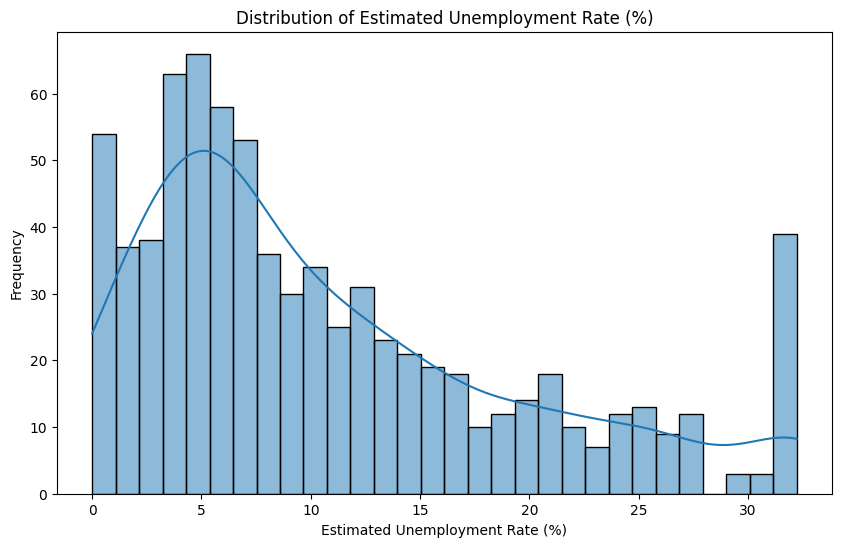

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data[' Estimated Unemployment Rate (%)'], kde=True, bins=30)
plt.title('Distribution of Estimated Unemployment Rate (%)')
plt.xlabel('Estimated Unemployment Rate (%)')
plt.ylabel('Frequency')
plt.show()

**monthly unemployment rates**

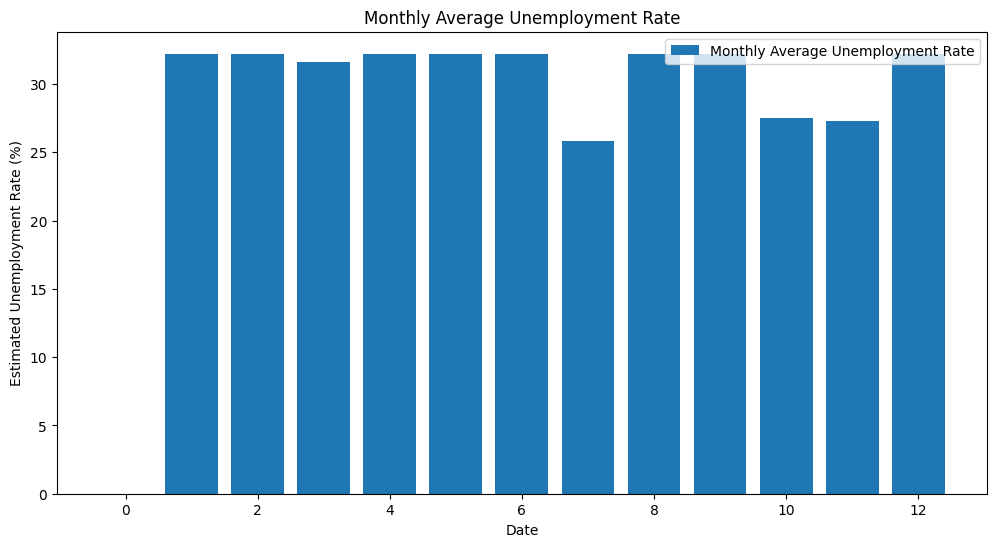

In [ ]:
# Plot the monthly unemployment rate
plt.figure(figsize=(12, 6))
plt.bar(data['Month'], data[' Estimated Unemployment Rate (%)'], label='Monthly Average Unemployment Rate')
plt.title('Monthly Average Unemployment Rate')
plt.xlabel('Date')
plt.ylabel('Estimated Unemployment Rate (%)')
plt.legend()
plt.show()


**yearly unemployment rates**

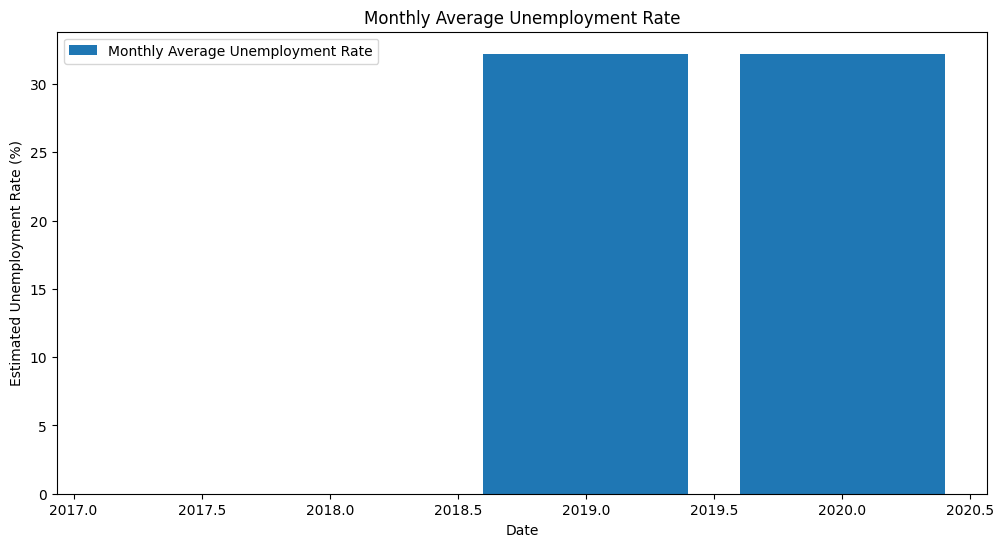

In [ ]:
# Plot the monthly unemployment rate
plt.figure(figsize=(12, 6))
plt.bar(data['Year'], data[' Estimated Unemployment Rate (%)'], label='Monthly Average Unemployment Rate')
plt.title('Monthly Average Unemployment Rate')
plt.xlabel('Date')
plt.ylabel('Estimated Unemployment Rate (%)')
plt.legend()
plt.show()


**Unemployment Rates by Region**

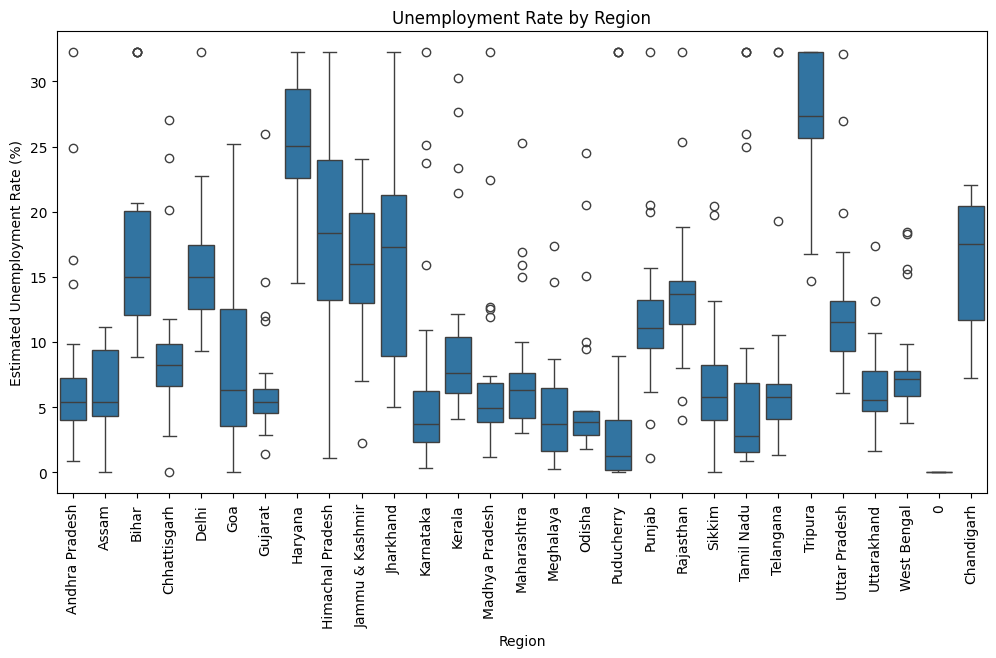

In [ ]:
# Boxplot of Unemployment Rates by Region
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='Region', y=' Estimated Unemployment Rate (%)')
plt.title('Unemployment Rate by Region')
plt.xlabel('Region')
plt.ylabel('Estimated Unemployment Rate (%)')
plt.xticks(rotation=90)
plt.show()


**Correlation matrix**

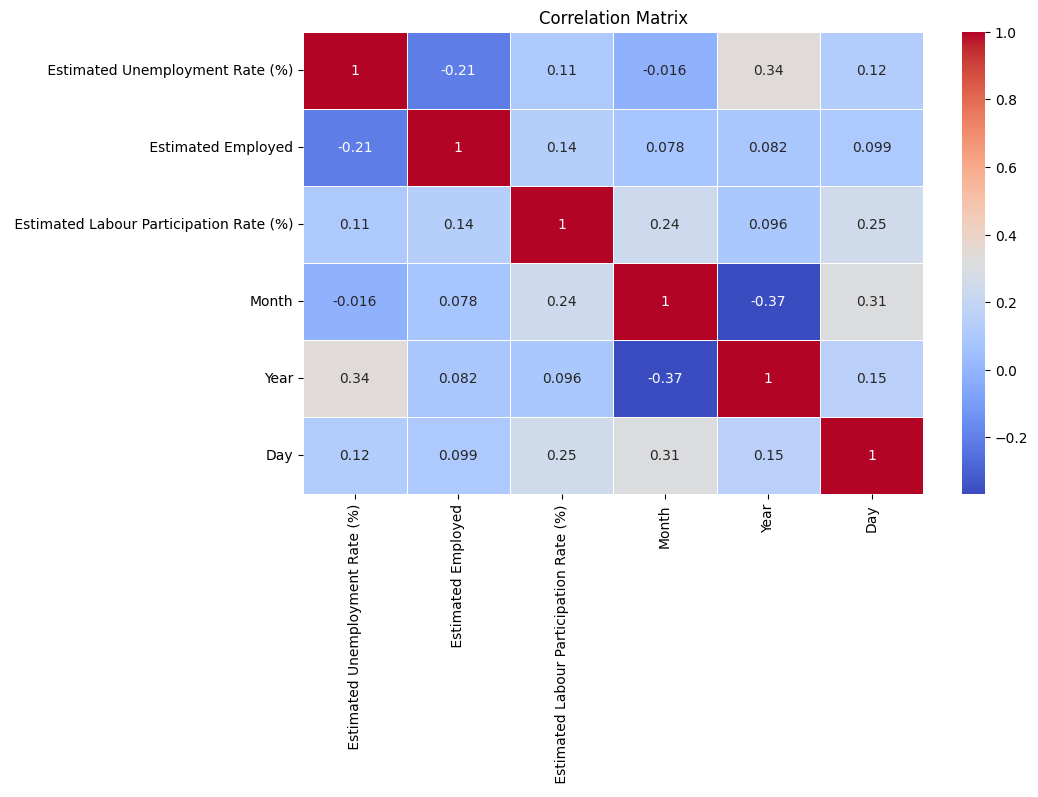

In [ ]:
# Correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(data[numerical_columns].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()
